# SQL, NoSQL, Big Data y todo lo demás

![bohio](https://www.iesbohio.es/web/images/ies/logobohioreducido.png)

Charla a los alumnos del IES El Bohio, 17 de noviembre de 2022.

## BohioControls !!!

### Una empresa de control domótico de edificios

![bohiocontrols](https://github.com/dsevilla/charla-bohio-22/raw/main/images/bohiocontrols.jpg)

In [ ]:
%load utils/functions.py

In [ ]:
from IPython.display import Image
from pprint import pprint as pp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import json

%matplotlib inline
try:
    matplotlib.style.use('seaborn-v0_8')
except:
    matplotlib.style.use('seaborn-white')

In [ ]:
wooclap("(SQL)")

In [ ]:
wooclap('(NoSQL)')

In [ ]:
wooclap('(JSON)')

In [ ]:
yoda(u"Para alcanzar la fuerza NoSQL debes conocer")

### Imaginemos

Imaginemos que queremos realizar la sensorización (domótica) de un edificio.

In [ ]:
say(u"Formato de sensor de temperatura/humedad")

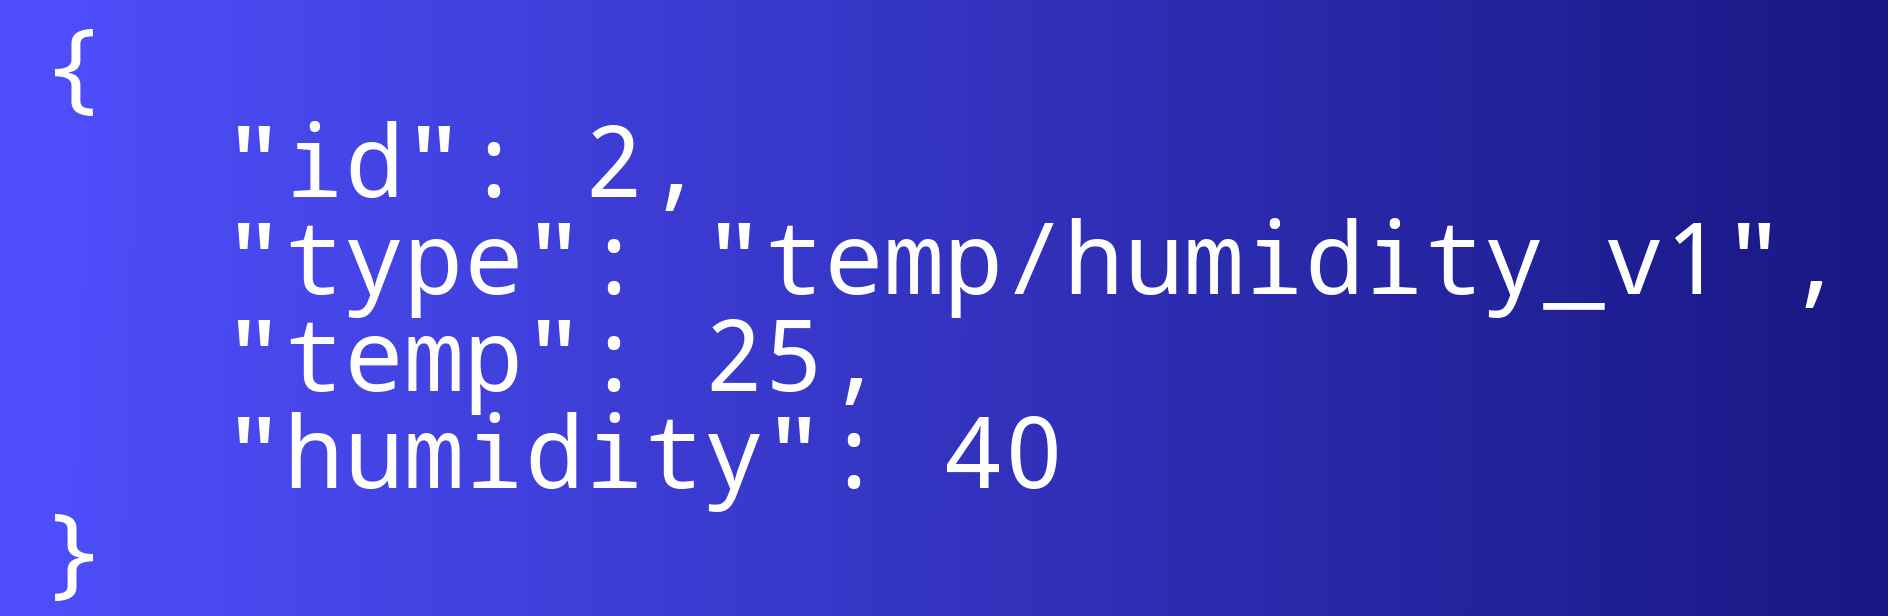

In [83]:
sayM(json.dumps({ "id" : 2, "type" : "temp/humidity_v1", "temp" : 25, "humidity": 40},indent=3), align='left')

In [ ]:
say(u"Formato de sensor de presencia")

In [ ]:
sayM(json.dumps({ "id" : 23, "type" : "presence_v1", "person_detected" : True},indent=3), align='left')

In [ ]:
say(u"Formato de sensor de luz")

In [ ]:
sayM(json.dumps({ "id" : 11, "type" : "light_sensor_v1", "light_level" : 10},indent=3), align='left')

In [ ]:
say(u"Vamos a probar con SQL...")

In [ ]:
%pip install ipython-sql

In [ ]:
%load_ext sql

Una base de datos en memoria... Para probar

In [ ]:
%env DATABASE_URL=sqlite:///test.db?cache=shared

In [ ]:
say(u'¿Cómo diseño el esquema?')

In [ ]:
%%sql
DROP TABLE IF EXISTS Buildings;
CREATE TABLE Buildings
(
    id   INTEGER,
    name TEXT,
    PRIMARY KEY(id)
);

In [ ]:
%%sql
DROP TABLE IF EXISTS Rooms;
CREATE TABLE Rooms
(
    id   INTEGER,
    name TEXT,
    building_id INTEGER,
    FOREIGN KEY(building_id) REFERENCES Buildings(id)
);

In [ ]:
%%sql
DROP TABLE IF EXISTS Sensors;
CREATE TABLE Sensors
(
    id   INTEGER,
    type TEXT,
    PRIMARY KEY(id)
);

In [ ]:
%%sql
DROP TABLE IF EXISTS SensorsInRooms;
CREATE TABLE SensorsInRooms
(
    room_id INTEGER,
    sensor_id INTEGER,
    FOREIGN KEY(room_id) REFERENCES Rooms(id),
    FOREIGN KEY(sensor_id) REFERENCES Sensors(id),
    PRIMARY KEY(room_id, sensor_id)
);

In [ ]:
%%sql
DROP TABLE IF EXISTS Readings;
CREATE TABLE Readings
(
    id        INTEGER,
    timestamp INTEGER,
    sensor_id INTEGER,
    type      STRING,
    -- datos de sensores
    PRIMARY KEY(id),
    FOREIGN KEY(sensor_id) REFERENCES Sensors(id)
);

In [ ]:
sayM(
'''CREATE TABLE Readings
(
    id        INTEGER,
    timestamp INTEGER,
    sensor_id INTEGER,
    type      STRING,
    -- datos de sensores
    PRIMARY KEY(id)
);''')

In [ ]:
%%capture
# Añado los sensores!

# Primero los de temperatura/humedad, 10 sensores, IDs 0 al 9
for i in range(0,10):
    %sql INSERT INTO Sensors VALUES (:i, "temp/humidity_v1")
    
# Sensores de luz, 10 sensores, IDs 10 al 19
for i in range(10,20):
    %sql INSERT INTO Sensors VALUES (:i, "light_sensor_v1")

# Sensores de presencia, 10 sensores, IDs 20 al 29
for i in range(20,30):
    %sql INSERT INTO Sensors VALUES (:i, "presence_v1")

In [84]:
%%sql
select * from Sensors;

 * sqlite:///file::memory:?cache=shared
Done.


id,type
0,temp/humidity_v1
1,temp/humidity_v1
2,temp/humidity_v1
3,temp/humidity_v1
4,temp/humidity_v1
5,temp/humidity_v1
6,temp/humidity_v1
7,temp/humidity_v1
8,temp/humidity_v1
9,temp/humidity_v1


In [ ]:
%%sql
DROP TABLE IF EXISTS Readings;
CREATE TABLE Readings
(
    id          INTEGER,
    timestamp   INTEGER,
    sensor_id   INTEGER,
    type        STRING,
    -- temp sensor
    temp        REAL,
    humidity    REAL,
    -- light_sensor
    light_level REAL,
    -- presence sensor
    person_detected INTEGER,
    PRIMARY KEY(id),
    FOREIGN KEY(sensor_id) REFERENCES Sensors(id)
);

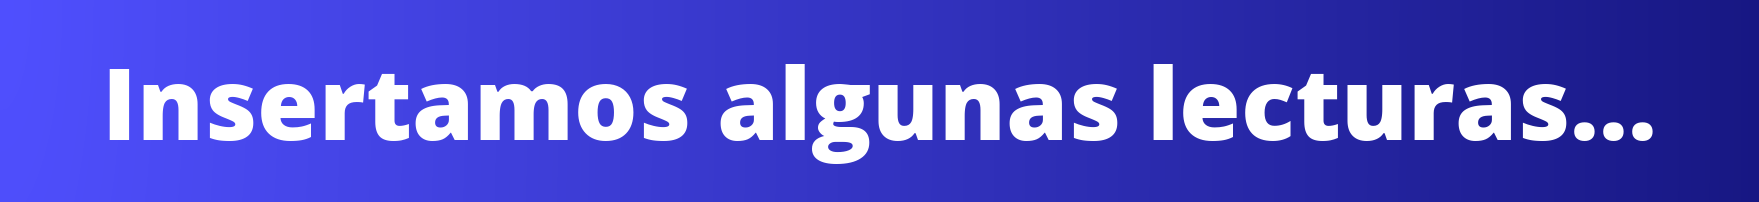

In [88]:
say(u'Insertamos algunas lecturas...')

In [ ]:
for i in range(20,30):
    %sql INSERT INTO Sensors VALUES (:i, "presence_v1")

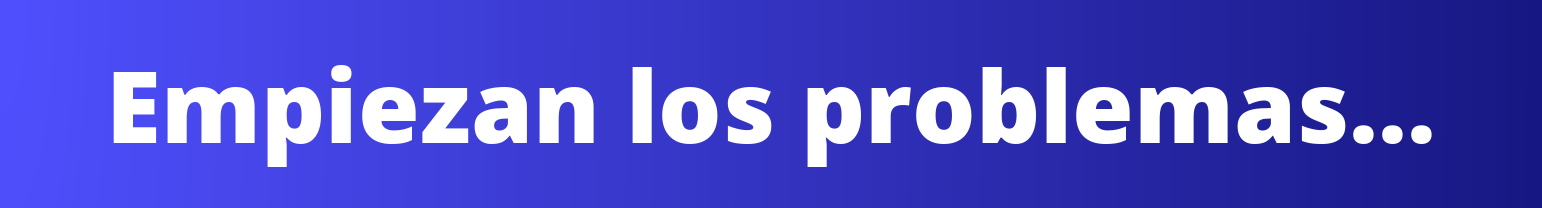

In [85]:
say(u"Empiezan los problemas...")

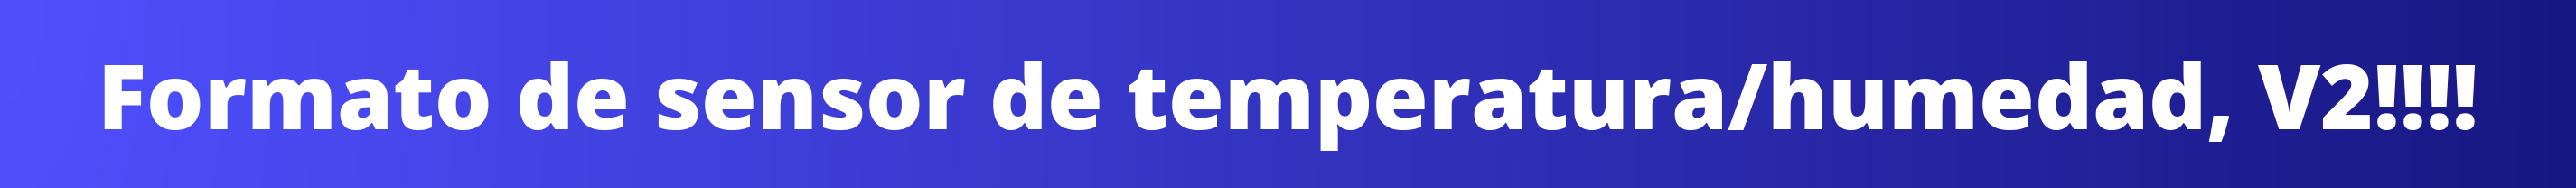

In [86]:
say(u"Formato de sensor de temperatura/humedad, V2!!!!")

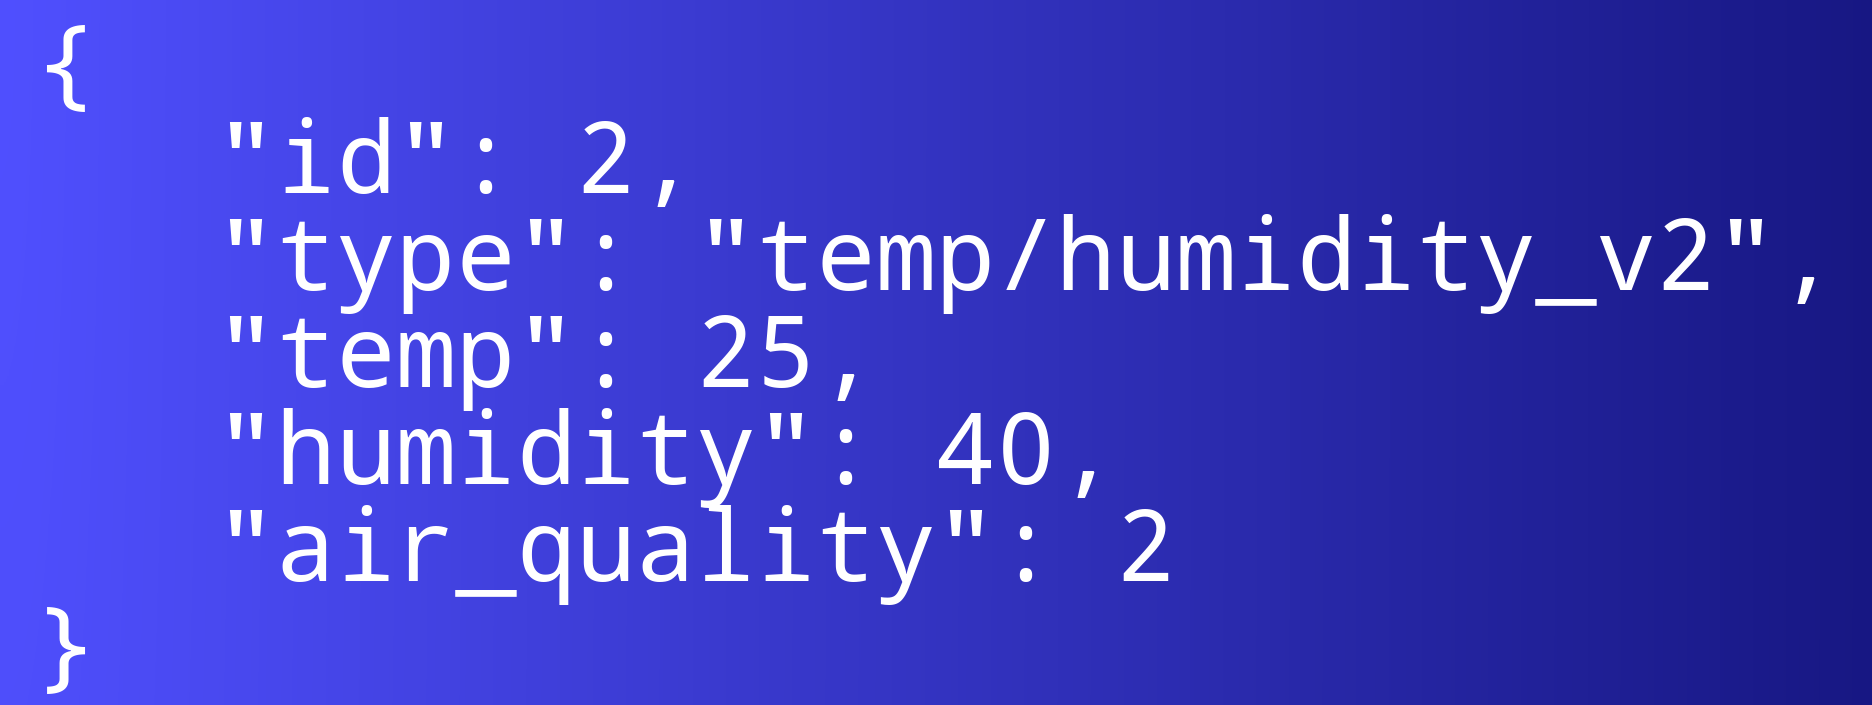

In [87]:
sayM(json.dumps({ "id" : 2, "type" : "temp/humidity_v2", "temp" : 25, "humidity": 40, "air_quality": 2},indent=3), align='left')

In [ ]:
!pip install pymongo
!pip install folium

In [ ]:
import pymongo
from pymongo import MongoClient
client = MongoClient("localhost", 27017)
client

Creamos una base de datos `codecamp18`:

In [ ]:
db = client.codecamp18

Y la colección `participantes18`:

In [ ]:
participantes18 = db.participantes18
participantes18

In [ ]:
participantes18.insert_one(
    {'nombre': 'Diego Sevilla Ruiz',
    'dni' : '12345678X',
    'photo': 'Chewbacca',
    'intereses' : ['charla#2', 'charla#3', 'charla#4', 'charla#5']
    })

In [ ]:
client.database_names()

In [ ]:
DictTable(participantes18.find_one())

In [ ]:
participantes18.insert_one(
    {'nombre': 'María José Ortín Ibáñez',
     'dni' : '23456789Y',
     'intereses' : ['charla#2', 'charla#3', 'charla#4', 'charla#5']
    })

También quieren guardar las diferentes charlas que hay... Para ello, nada mejor que obtener la lista de charlas desde la propia página web... :)

In [ ]:
charlas18 = db.charlas18

In [ ]:
# "extra/CodeCamp2018.html"
charlas = pd.read_html('https://dafi.inf.um.es/CodeCamp/ediciones/2018/',
                       attrs={'class': 'table'})

In [ ]:
charlas = charlas[1]
charlas

In [ ]:
for row in charlas.itertuples():
    charlas18.insert_one({'_id' : "charla%s" % (row[1]),
                          'título' : row[2],
                          'ponentes' : row[3]
                         })

In [ ]:
ListDictTable(list(charlas18.find()))

# MongoDB (documentos)

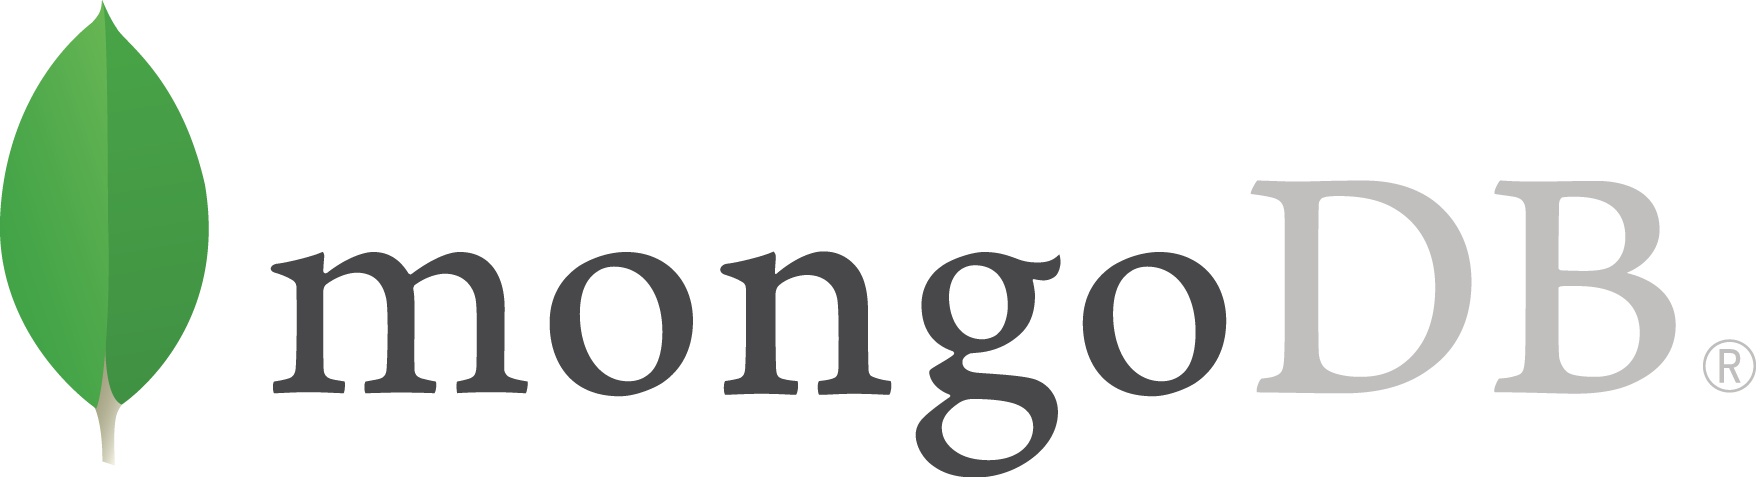

Base de datos documental que usaremos como ejemplo. Una de las más extendidas:

- Modelo de documentos JSON (BSON, en binario, usado para eficiencia)
- Map-Reduce para transformaciones de la base de datos y consultas
- Lenguaje propio de manipulación de la base de datos llamado "de agregación" (aggregate)
- Soporta sharding (distribución de partes de la BD en distintos nodos)
- Soporta replicación (copias sincronizadas master-slave en distintos nodos)
- No soporta ACID
- La transacción se realiza a nivel de **DOCUMENTO**

## Añadiendo a los participantes

Obviamente no tengo la lista de participantes. Generaremos unos cuantos para tener datos como los que se tendrían en el CodeCamp...

In [ ]:
nombres = ['Darth', 'Han', 'Obi-Wan', 'Leia', 'Padmé', 'Yoda', 'Anakin', 'Luke', 'Chewbacca', 'Kylo', 'Jabba']
apellidos = ['Vader', 'Solo', 'Kenobi', 'Organa', 'Amidala', 'Skywalker', 'Ren', 'Maul', 'el Hutt']
nombres_charlas = list(charlas[0].apply(lambda e: "charla%s" % (e)))

import random
import string

def genera_participantes():
    for nombre in nombres:
        for apellido in apellidos:
            nombre_apellido = "%s %s" % (nombre, apellido)          
            participantes18.insert_one(
                {'nombre': nombre_apellido,
                 'dni': ''.join(random.sample(string.digits, 8) +
                                random.sample(string.ascii_uppercase, 1)),
                 'intereses': sorted(random.sample(nombres_charlas,
                                                   random.randint(1,len(nombres_charlas))))
                                 
                })
                
# Llamar a la función
genera_participantes()

In [ ]:
participantes18.find_one({'nombre': 'Luke Skywalker'})

## Shell de Mongo
Para usar el shell de mongo en Javascript:

    docker exec -it mongo mongo

## Ups, olvidé añadir la ciudad de cada persona

In [ ]:
ciudades = ['Mula']

In [ ]:
df = pd.read_csv('extra/municipios-españa-2017.csv.gz',header=0,compression='gzip')

In [ ]:
df.head()

In [ ]:
mula = df[df.NOMBRE_ACTUAL==ciudades[0]].iloc[0]
mula

In [ ]:
import folium

map = folium.Map(location=[38,-1.5],zoom_start=9)
for nombre_ciudad in ciudades:
    ciudaddf = df[df.NOMBRE_ACTUAL == nombre_ciudad]
    if not ciudaddf.empty:
        ciudad = ciudaddf.iloc[0]
        folium.Marker(location=[ciudad.LATITUD_ETRS89,ciudad.LONGITUD_ETRS89],
                      popup=nombre_ciudad).add_to(map)
    else:
        print("No encontrado: %s" % (nombre_ciudad))

map

Añado una ciudad al azar a cada participante:

In [ ]:
for obj in participantes18.find({'ciudad': {'$exists' : False}}):
    participantes18.update_one({'_id': obj['_id']},
                               {'$set' : {'ciudad': random.sample(ciudades,1)[0]}})

In [ ]:
list(participantes18.find())

## Consultas sencillas

Distribución del número de charlas en las que están interesadas los asistentes.

In [ ]:
intereses = participantes18.find(filter={},projection={'intereses': True})

In [ ]:
df = pd.DataFrame([len(s.get('intereses',[])) for s in intereses])
df.astype('int32').plot.hist(bins=[0,1,2,3,4,5,6],figsize=(16,16*3/4))

La función `find()` tiene un gran número de posibilidades para especificar la búsqueda. Se pueden utilizar cualificadores complejos como:

- `$and`
- `$or`
- `$not`

Estos calificadores unen "objetos", no valores. Por otro lado, hay otros calificadores que se refieren a valores:

- `$lt` (menor)
- `$lte` (menor o igual)
- `$gt` (mayor)
- `$gte` (mayor o igual)
- `$regex` (expresión regular)

In [ ]:
participantes18.find_one({'nombre': {'$regex' : '.*? Vader'}})

MongoDB incluye dos APIs para procesar y buscar documentos: el API de Map-Reduce y el API de agregación. Veremos primero el de Map-Reduce. Manual: https://docs.mongodb.com/manual/aggregation/#map-reduce



In [ ]:
df = pd.DataFrame(data = [int(r['value']) for r in results], 
                  index = [int(r['_id']) for r in results], 
                  columns=['interesados por número de cursos'])
df.plot(kind='bar',figsize=(20,20*3/4))

## ¿Cuántos interesados en cada charla?:

En SQL:

```
SELECT C.titulo, COUNT(*) interesados
FROM CHARLA C JOIN INTERESADO_CHARLA I 
     ON C.codigo=I.charla
GROUP BY C.titulo 
ORDER BY COUNT(*) DESC ;
```

¿Cómo se haría en MongoDB?

In [ ]:
from bson.code import Code
map = Code(
    '''function () {
           this.intereses.forEach(function(i) {
               emit(i, 1)
           })
       }''')
reduce = Code(
    '''function (key, values) {
            return Array.sum(values);
        }''')
results = participantes18.map_reduce(map, reduce, "myresults")
results = list(db.myresults.find(sort=[('value',-1)]))
results

In [ ]:
yoda(u'May the force be with you')

In [ ]:
chew('Grrrrrrrrrr!')